##파일 불러오기

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [1]:
import pandas as pd
import numpy as np
import folium
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from folium.plugins import MarkerCluster
from IPython.display import display, HTML

In [2]:
!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123598 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/EDA 프로젝트 도시환경/[최종]공원+교육+문화시설+의료시설+종속변수 데이터.csv",encoding="cp949")

In [ ]:
df[['미술관','박물관','도서관']]=df[['미술관','박물관','도서관']].fillna(0.0)

In [3]:
df2=pd.read_csv("/content/drive/MyDrive/EDA 프로젝트 도시환경/[진짜최종]공원+교육+문화시설+의료시설+종속변수 데이터.csv",encoding="cp949")

In [4]:
df2[['미술관','박물관','도서관']]=df2[['미술관','박물관','도서관']].fillna(0.0)

In [5]:
df2.head()

,시도,행정구,삶의 만족도,1인당 GRDP,신혼부부수,평균 자살율,평균 소득,미술관,도서관,박물관,...,약국,요양병원,의원,정신병원,조산원,종합병원,치과병원,치과의원,한방병원,한의원
0,충북,청주시,0.2927,4056.0,19299,23.4,37455.0,9.0,19.0,11.0,...,173.465664,5.573718,234.334850,1.541013,0.515932,2.803072,1.268940,124.000951,3.685235,103.553072
1,경기,남양주시,0.3529,1762.0,15517,21.4,37261.0,4.0,13.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,세종,세종특별자치시,0.9077,NaN,10959,NaN,NaN,0.0,0.0,0.0,...,39.104150,1.042777,53.703033,0.260694,0.000000,0.521389,0.260694,25.287350,0.782083,21.637630
3,서울,종로구,0.4437,22977.0,2043,15.7,42022.0,18.0,7.0,38.0,...,120.951485,0.707319,141.463725,0.000000,0.000000,1.414637,0.707319,98.317289,1.414637,79.927005
4,서울,중구,0.4976,44764.0,2582,20.2,38282.0,3.0,9.0,17.0,...,131.188920,0.000000,209.238025,0.000000,0.000000,0.830310,4.151548,164.401305,0.830310,78.049105


##LGBM

In [ ]:
df.head()

,시도,행정구,삶의 만족도,1인당 GRDP,신혼부부수,평균 자살율,평균 소득,미술관,도서관,박물관,...,여자_약국,여자_요양병원,여자_의원,여자_정신병원,여자_조산원,여자_종합병원,여자_치과병원,여자_치과의원,여자_한방병원,여자_한의원
0,충북,청주시,0.2927,4056.0,19299,23.4,37455.0,9.0,19.0,11.0,...,349.981493,11.205127,473.078018,3.067270,1.063807,5.649461,2.562182,250.398845,7.420389,208.875941
1,경기,남양주시,0.3529,1762.0,15517,21.4,37261.0,4.0,13.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,세종,세종특별자치시,0.9077,NaN,10959,NaN,NaN,0.0,0.0,0.0,...,78.042892,2.081144,107.178905,0.520286,0.000000,1.040572,0.520286,50.467737,1.560858,43.183734
3,서울,종로구,0.4437,22977.0,2043,15.7,42022.0,18.0,7.0,38.0,...,234.297928,1.370163,274.032665,0.000000,0.000000,2.740327,1.370163,190.452702,2.740327,154.828456
4,서울,중구,0.4976,44764.0,2582,20.2,38282.0,3.0,9.0,17.0,...,255.357662,0.000000,407.279310,0.000000,0.000000,1.616188,8.080939,320.005172,1.616188,151.921647


##신혼부부수

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1259
[LightGBM] [Info] Number of data points in the train set: 183, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 4801.803279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

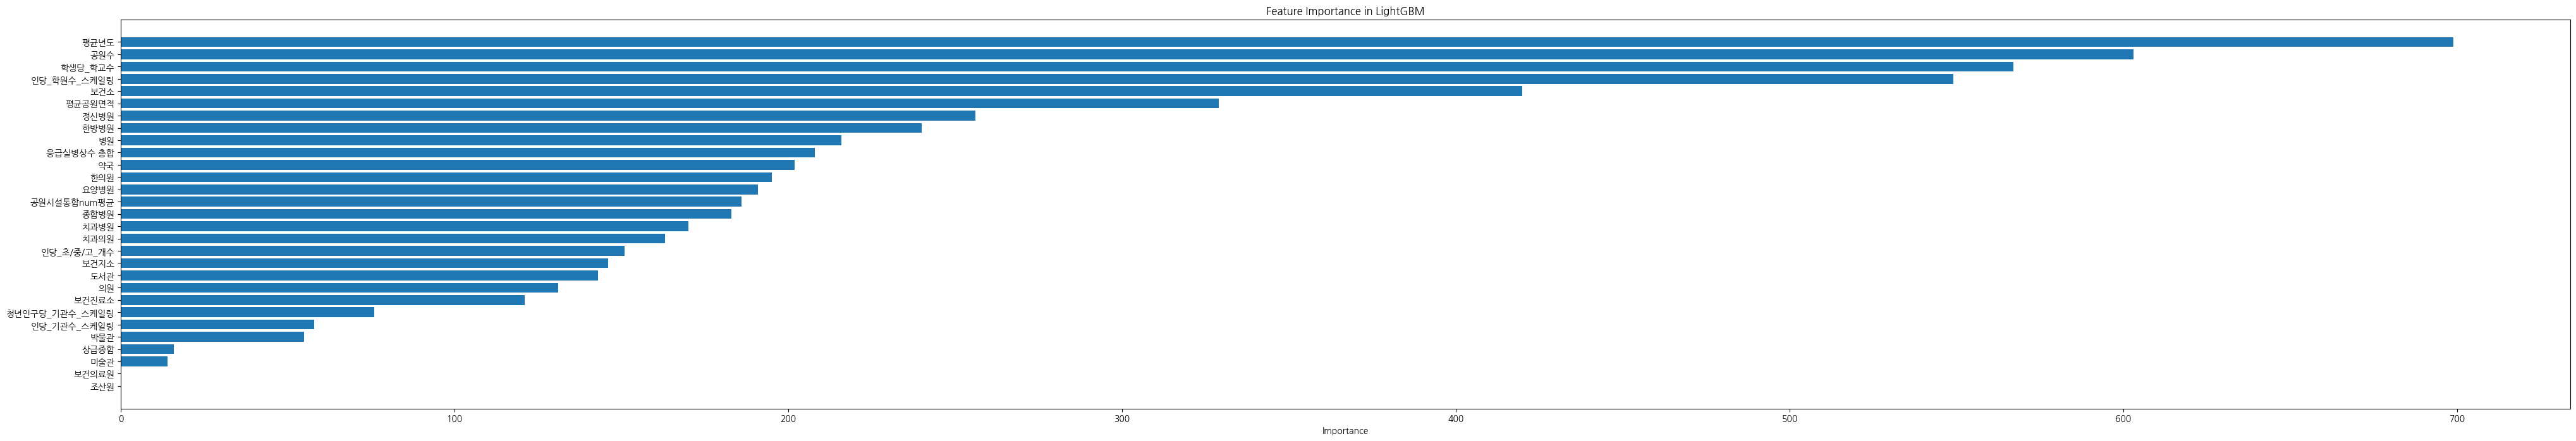

In [ ]:
# 종속 변수와 독립 변수 정의 (예: '평균 소득'을 예측)
target_variable = '신혼부부수'
features = df.drop(columns=[target_variable,'삶의 만족도','1인당 GRDP','평균 자살율','평균 소득' ,'시도', '행정구'])  # 시도 및 행정구 제거

# 종속 변수와 독립 변수 분리
X = features
y = df[target_variable]

# 학습용 및 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 데이터셋 생성
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# LightGBM 하이퍼파라미터 설정
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 모델 학습
gbm = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, test_data]
)

# 특징 중요도 계산
importance = gbm.feature_importance()
feature_names = X.columns

# 중요도 데이터프레임 생성
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# 중요도 시각화
plt.figure(figsize=(50, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in LightGBM')
plt.gca().invert_yaxis()
plt.show()

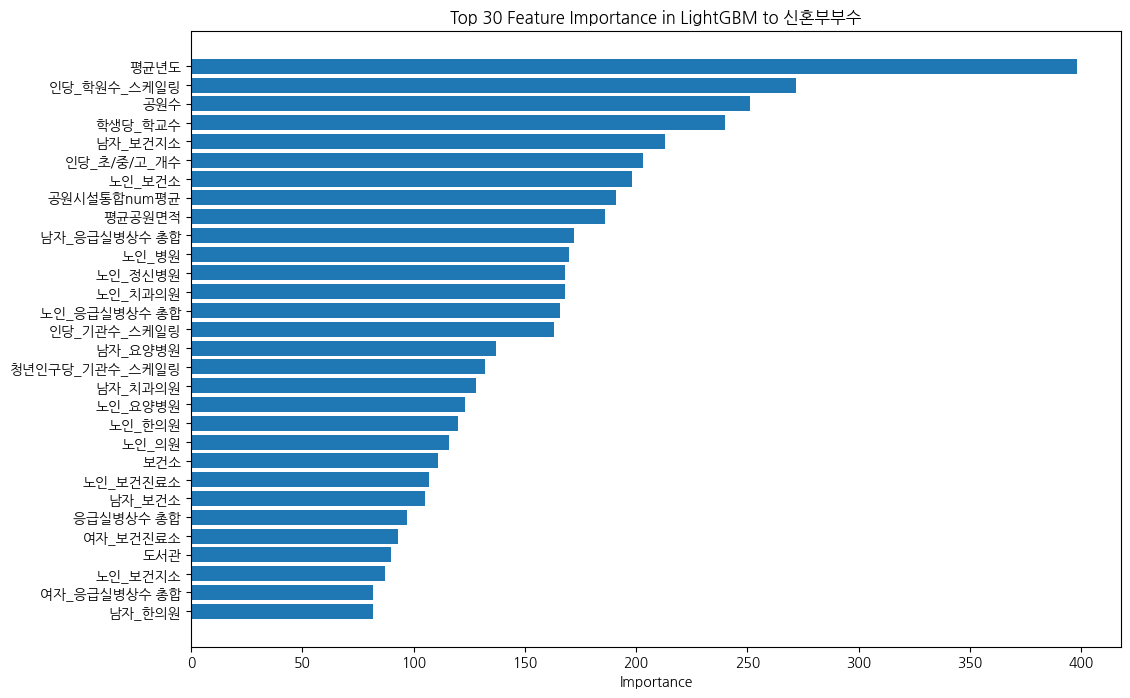

In [ ]:
# 상위 30개 특징 선택
top_n = 30
top_features = importance_df.head(top_n)

# 상위 30개 특징 중요도 시각화
plt.figure(figsize=(12, 8))  # 크기를 적절하게 조정
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 30 Feature Importance in LightGBM to 신혼부부수')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 13.5 MB/s eta 0:00:00


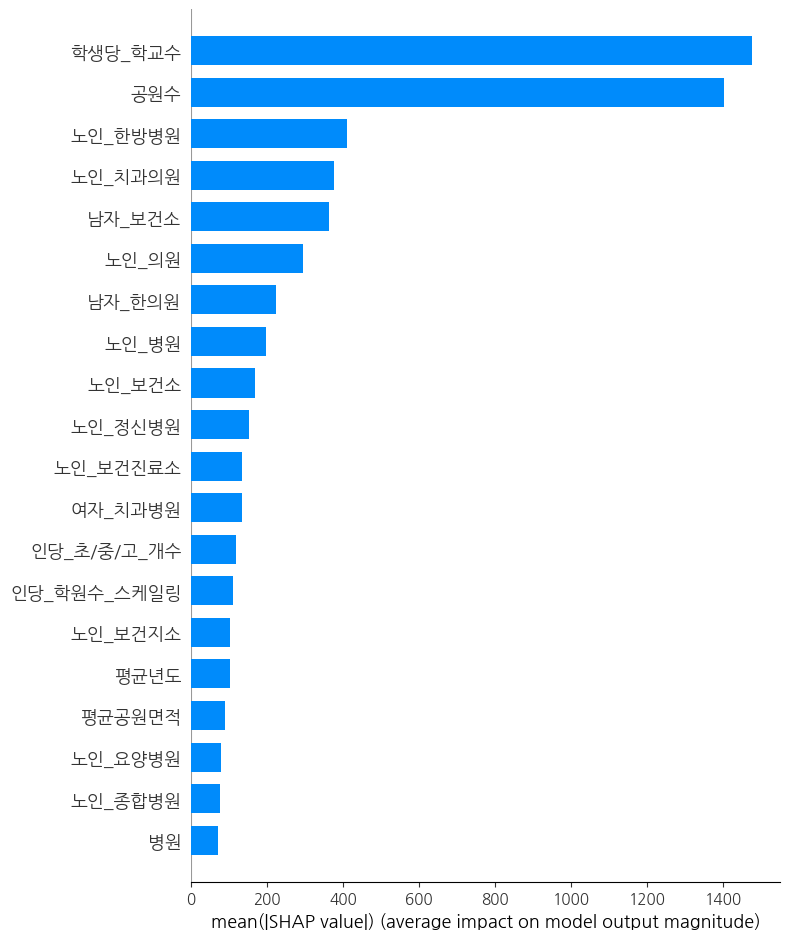

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


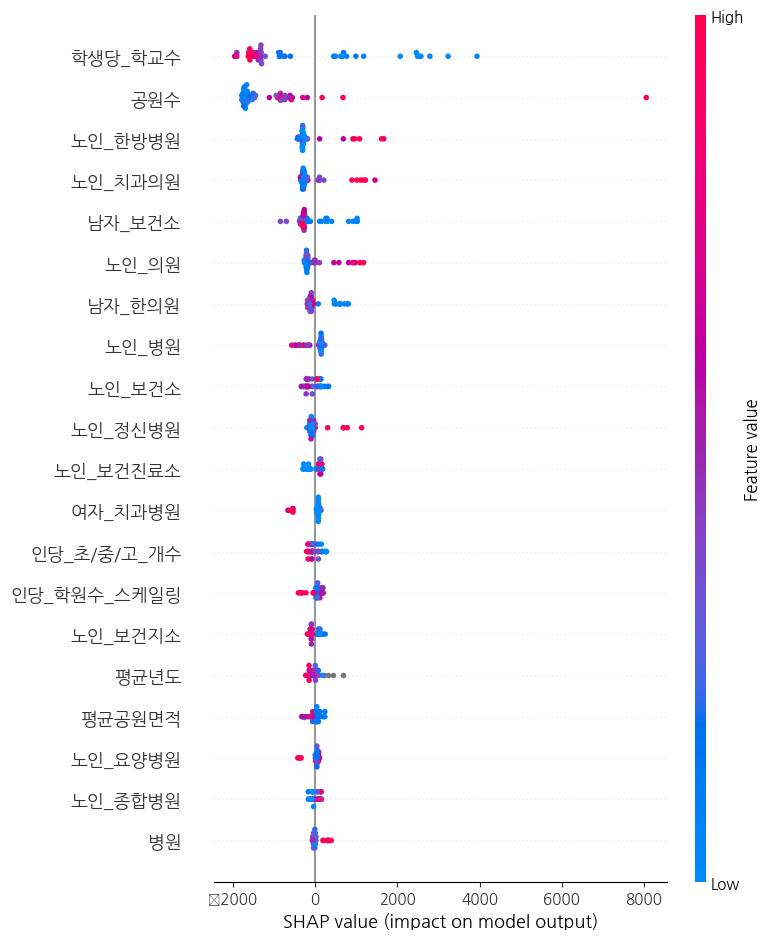

In [ ]:
import shap

# SHAP 값 계산
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_test)

# SHAP 요약 플롯
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)

# SHAP 산점도 플롯
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# 개별 예측에 대한 SHAP 값 시각화 (예: 첫 번째 샘플)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], feature_names=X.columns)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


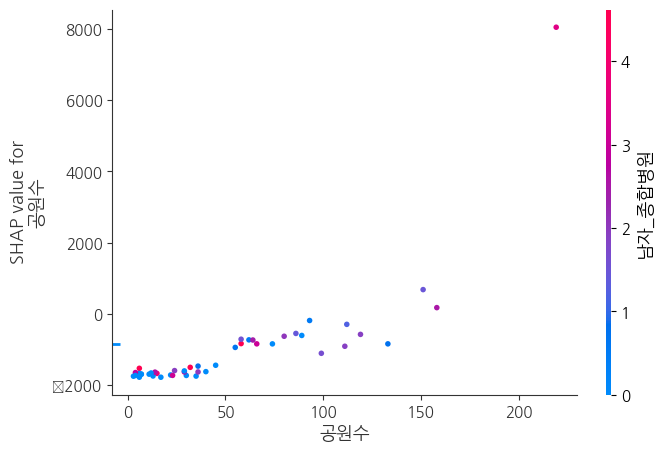

In [ ]:
shap.dependence_plot("공원수",shap_values,X_test)

전체 종속변수

In [ ]:
target_variables = ['신혼부부수', '평균 소득','삶의 만족도','1인당 GRDP','평균 자살율']
features = df.drop(columns=target_variables + ['시도', '행정구'])  # 시도 및 행정구 제거

# 종속 변수와 독립 변수 분리
X = features
y = df[target_variables]  # 여러 종속 변수

# 학습용 및 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# LightGBM 데이터셋 생성
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

models = {}
predictions = {}

for target in target_variables:
    # LightGBM 하이퍼파라미터 설정
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9
    }

    # 모델 학습
    models[target] = lgb.train(
        params,
        lgb.Dataset(X_train, label=y_train[target]),
        num_boost_round=1000,
        valid_sets=[lgb.Dataset(X_train, label=y_train[target]), lgb.Dataset(X_test, label=y_test[target])]
    )

    # 예측 수행
    predictions[target] = models[target].predict(X_test, num_iteration=models[target].best_iteration)

# 평가
for target in target_variables:
    rmse = np.sqrt(mean_squared_error(y_test[target], predictions[target]))
    print(f"{target}의 RMSE: {rmse}")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

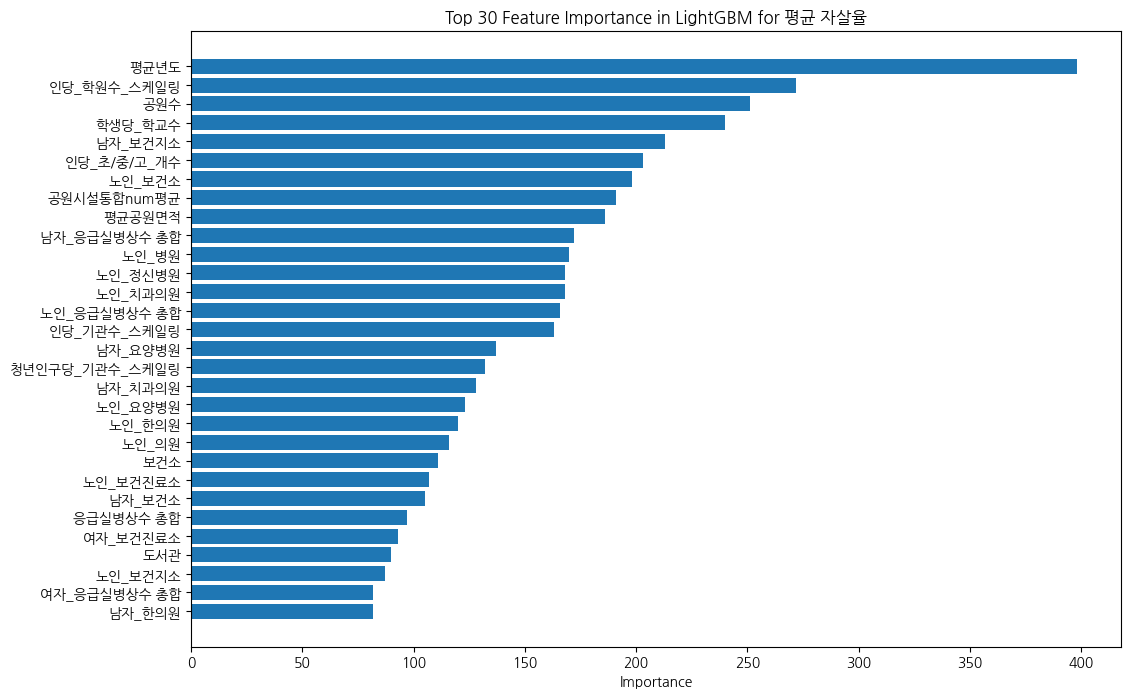

In [ ]:
 # 특징 중요도 계산 및 정렬
importance = models[target].feature_importance()
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

    # 상위 30개 특징 중요도 시각화
top_n = 30
top_features = importance_df.head(top_n)

plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title(f'Top 30 Feature Importance in LightGBM for {target}')
plt.gca().invert_yaxis()
plt.show()

##신혼부부수 다중회귀

In [9]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
df3=pd.read_csv("/content/drive/MyDrive/EDA 프로젝트 도시환경/[진짜찐최종]공원+교육+문화시설+의료시설+종속변수 데이터.csv",encoding="cp949")

In [11]:
# 데이터 준비
features = ['평균년도', '평균공원면적', '병원', '응급실병상수 총합', '공원수']
X = df3[features]
y = df3['신혼부부수_스케일링']

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

# 상수항 추가
X = sm.add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

     VIF Factor   features
0  68137.265999      const
1      1.012586       평균년도
2      1.101430     평균공원면적
3      1.430131         병원
4      1.440388  응급실병상수 총합
5      1.118809        공원수


<ipython-input-11-433053e2b23d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-11-433053e2b23d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [12]:
# 원본 데이터
y = df3['신혼부부수_스케일링']

# 로그 변환 (0이 포함된 경우 y에 1을 더함)
y_log = np.log(y + 1)

In [18]:
# 상수항 추가
X = sm.add_constant(X)

# OLS 모델 구축
model= sm.OLS(y_log, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             신혼부부수_스케일링   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     15.00
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           1.08e-12
Time:                        06:27:10   Log-Likelihood:                 140.05
No. Observations:                 229   AIC:                            -268.1
Df Residuals:                     223   BIC:                            -247.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9627      2.295      0.420      0.6

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


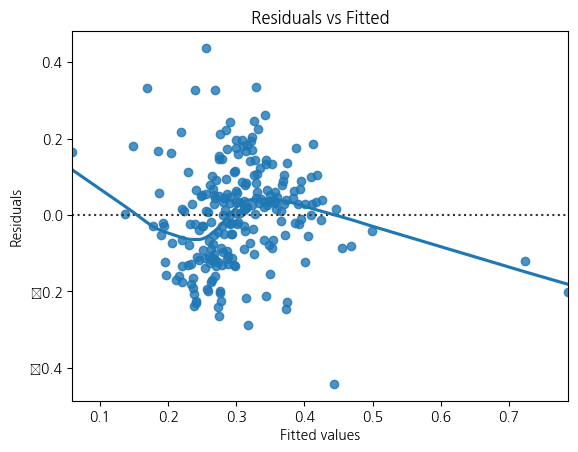

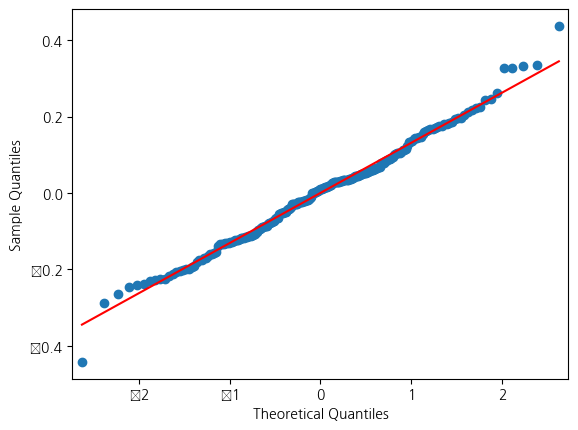

In [19]:
import seaborn as sns

# 잔차 플롯
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Q-Q 플롯으로 정규성 검정
fig = sm.qqplot(model.resid, line='s')
plt.show()

##1인당 GRDP

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3442
[LightGBM] [Info] Number of data points in the train set: 183, number of used features: 72
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 4011.404372
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

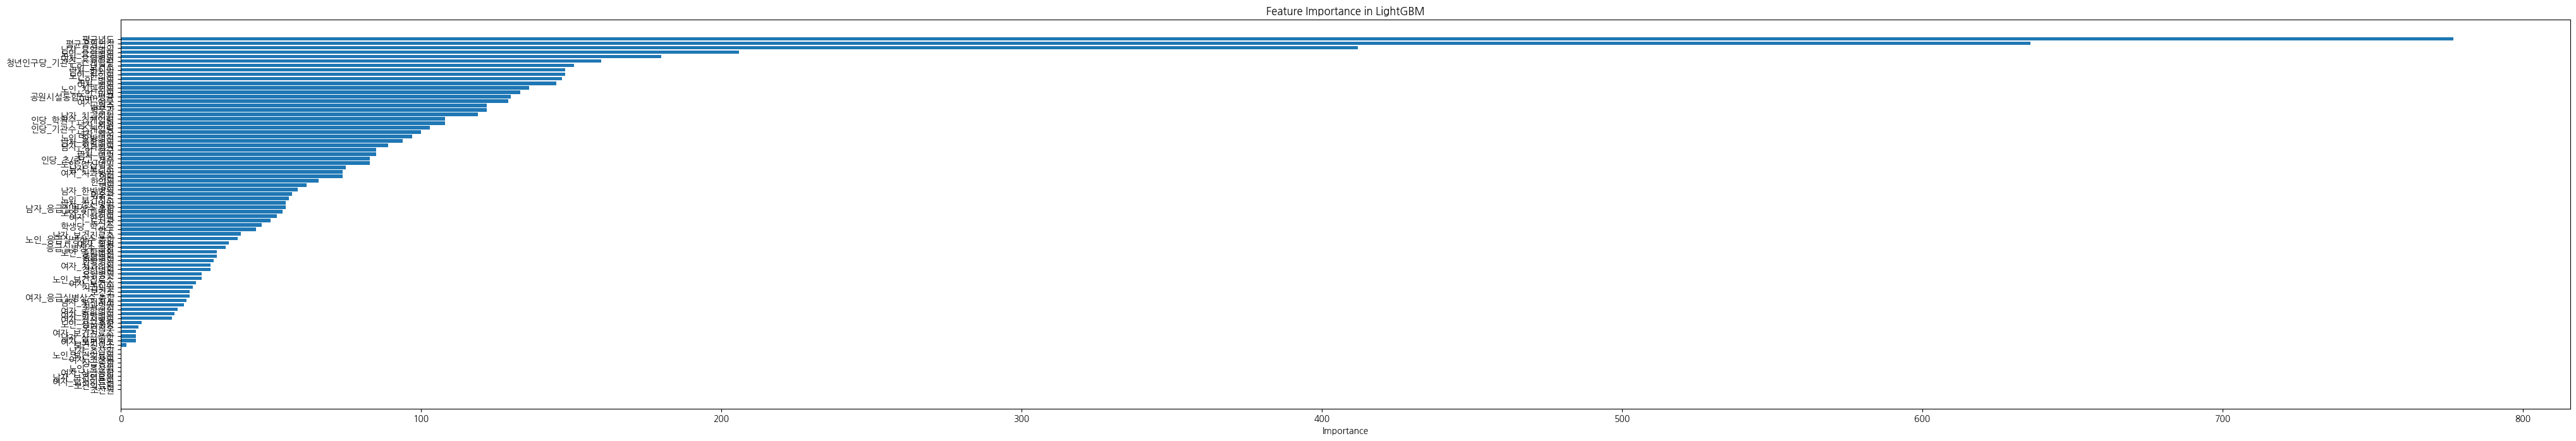

In [ ]:
# 종속 변수와 독립 변수 정의 (예: '평균 소득'을 예측)
target_variable = '1인당 GRDP'
features = df.drop(columns=[target_variable,'삶의 만족도','신혼부부수','평균 자살율','평균 소득' ,'시도', '행정구'])  # 시도 및 행정구 제거

# 종속 변수와 독립 변수 분리
X = features
y = df[target_variable]

# 학습용 및 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 데이터셋 생성
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# LightGBM 하이퍼파라미터 설정
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 모델 학습
gbm = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, test_data]
)

# 특징 중요도 계산
importance = gbm.feature_importance()
feature_names = X.columns

# 중요도 데이터프레임 생성
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# 중요도 시각화
plt.figure(figsize=(50, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in LightGBM')
plt.gca().invert_yaxis()
plt.show()

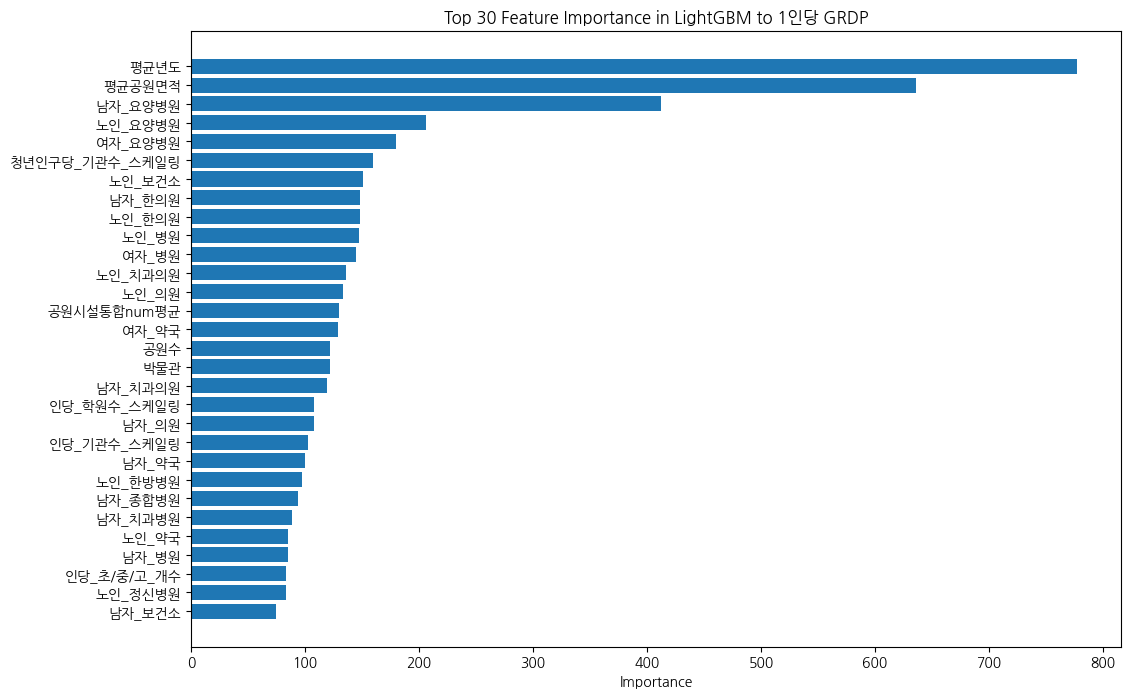

In [ ]:
# 상위 30개 특징 선택
top_n = 30
top_features = importance_df.head(top_n)

# 상위 30개 특징 중요도 시각화
plt.figure(figsize=(12, 8))  # 크기를 적절하게 조정
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 30 Feature Importance in LightGBM to 1인당 GRDP')
plt.gca().invert_yaxis()
plt.show()

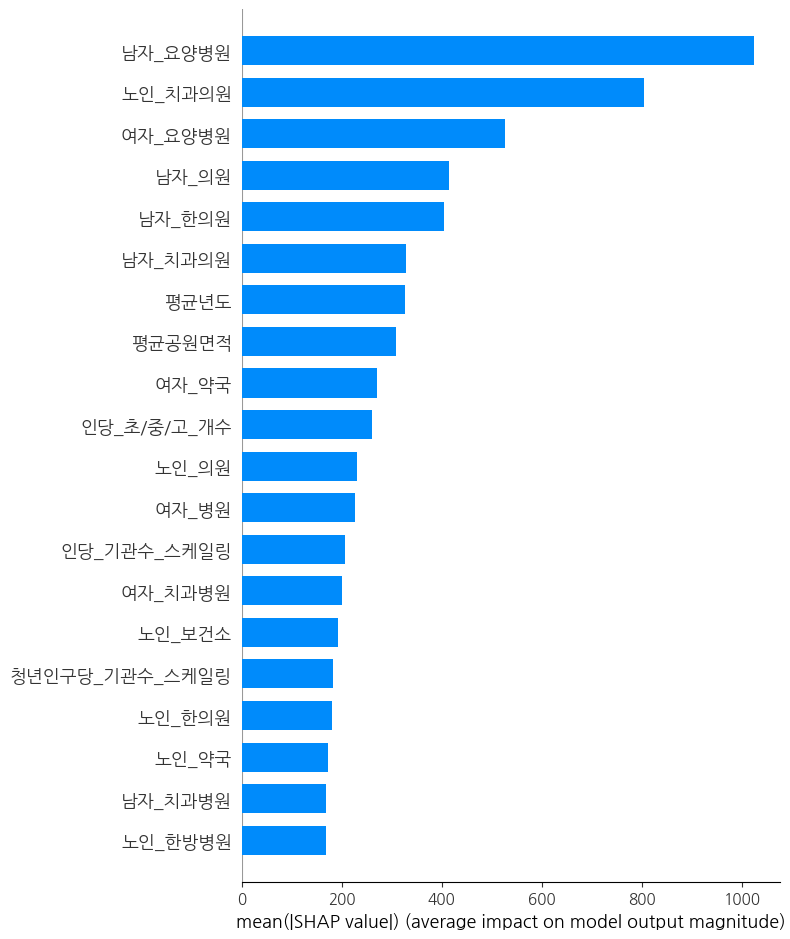

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


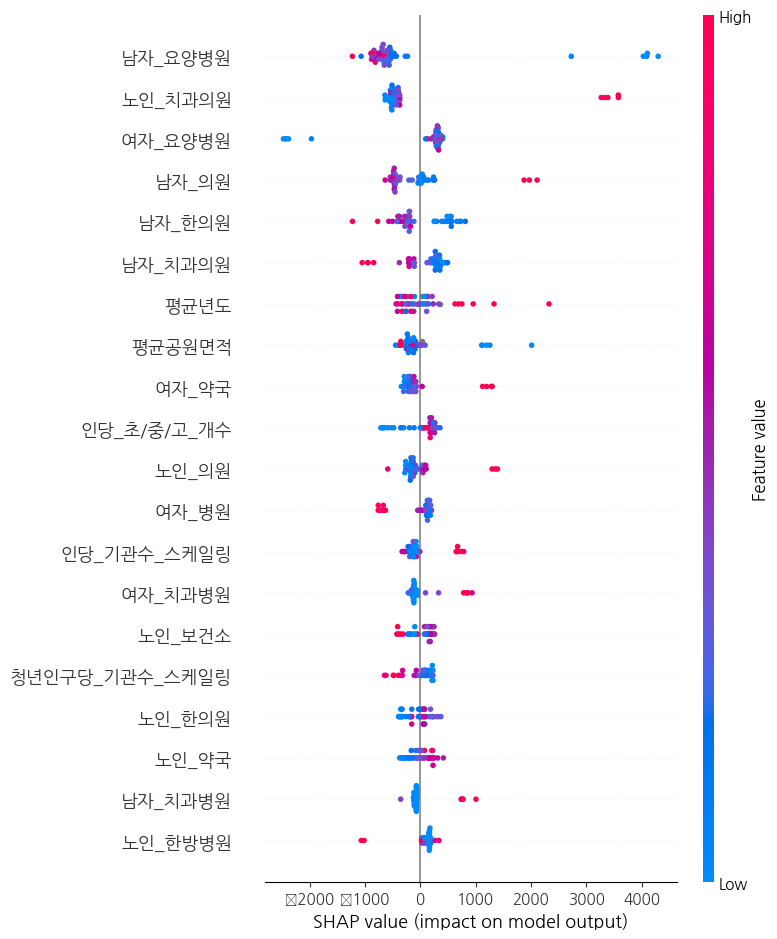

In [ ]:
# SHAP 값 계산
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_test)

# SHAP 요약 플롯
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)

# SHAP 산점도 플롯
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# 개별 예측에 대한 SHAP 값 시각화 (예: 첫 번째 샘플)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], feature_names=X.columns)

##삶의 만족도

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1259
[LightGBM] [Info] Number of data points in the train set: 183, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.492051
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

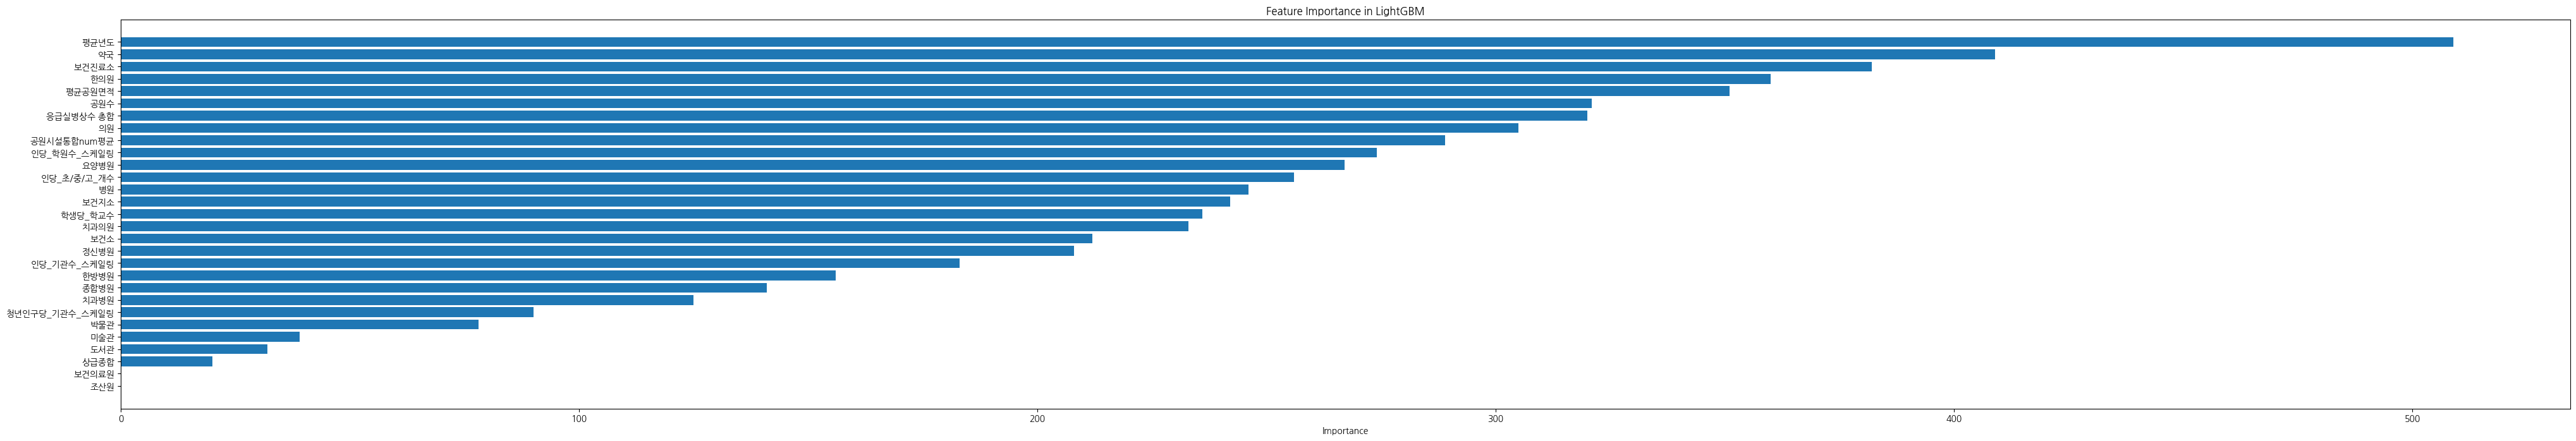

In [ ]:
# 종속 변수와 독립 변수 정의 (예: '평균 소득'을 예측)
target_variable = '삶의 만족도'
features = df2.drop(columns=[target_variable,'1인당 GRDP','신혼부부수','평균 자살율','평균 소득' ,'시도', '행정구'])  # 시도 및 행정구 제거

# 종속 변수와 독립 변수 분리
X = features
y = df2[target_variable]

# 학습용 및 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 데이터셋 생성
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# LightGBM 하이퍼파라미터 설정
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 모델 학습
gbm = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, test_data]
)

# 특징 중요도 계산
importance = gbm.feature_importance()
feature_names = X.columns

# 중요도 데이터프레임 생성
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# 중요도 시각화
plt.figure(figsize=(50, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in LightGBM')
plt.gca().invert_yaxis()
plt.show()

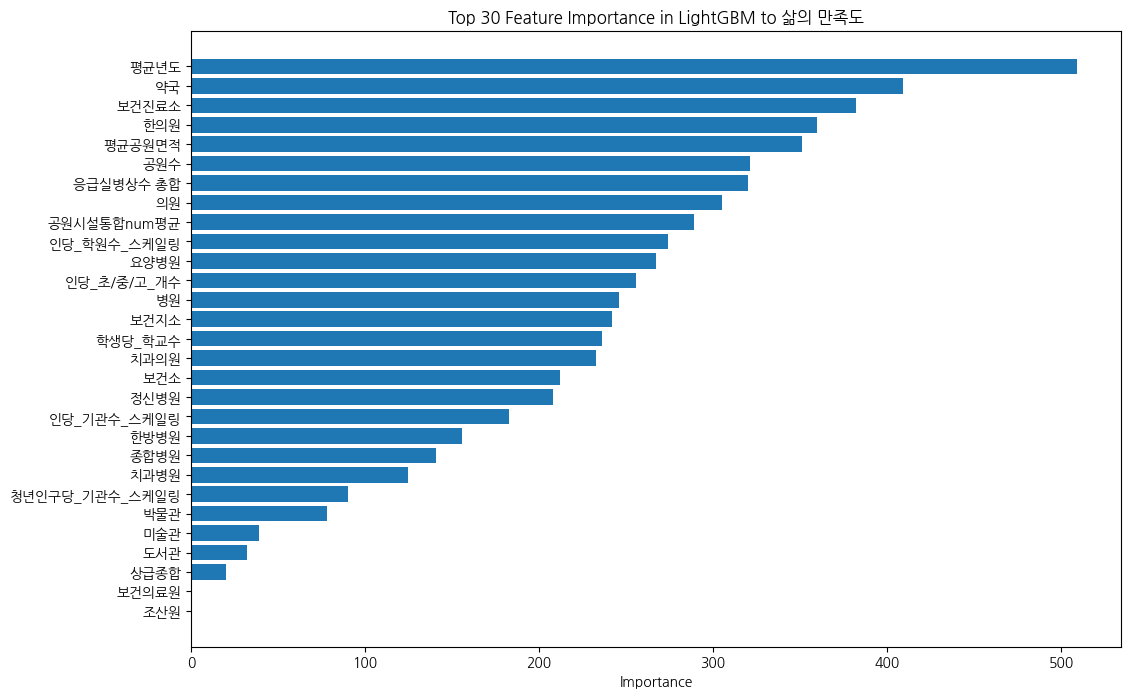

In [ ]:
# 상위 30개 특징 선택
top_n = 30
top_features = importance_df.head(top_n)

# 상위 30개 특징 중요도 시각화
plt.figure(figsize=(12, 8))  # 크기를 적절하게 조정
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 30 Feature Importance in LightGBM to 삶의 만족도')
plt.gca().invert_yaxis()
plt.show()